In [2]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import os
import pandas as pd
import scipy
#from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
OUTDIR = "pdfs/"

Populating the interactive namespace from numpy and matplotlib


This notebook contains code to generate the following results from Zheng et al 2020:

* Figure 2A: model interpretation comparison
* Figure 2B: example simulated sequences
* Figure 2C: example GCAM for real SP1 data example
* Figure 2D: Aggregate importance scores heatmap (pos)
* Extended Data Figure 2: Aggregate importance scores heatmap (neg)
* Figure 2E: Aggregate examples for specific TFs

# Figure 2A: model interpretation comparison

In [ ]:
def draw_curve(path):
    root = "/storage/pandaman/project/AgentBind-Simulation/"
    motif_list_auc = []
    for line in open("/storage/pandaman/project/AgentBind-Simulation/"+path+"motif_pos_for_auc.txt"):
        motif_list_auc.append(float(line))
    ranks_list_auc = []
    for line in open(path+"ranks_for_auc.txt"):
        ranks_list_auc.append(float(line))
    
    auc_value = roc_auc_score(motif_list_auc, ranks_list_auc)
    print ("%s :: auc val - %f" %(path, auc_value))
    fpr, tpr, thresholds = roc_curve(motif_list_auc, ranks_list_auc)
    return fpr, tpr

fpr_gcam, tpr_gcam = draw_curve("results_new/gcam/c/simulated-TAL1/")
fpr_reg, tpr_reg = draw_curve("results_new/reg/c/simulated-TAL1/")
fpr_prtb, tpr_prtb = draw_curve("results_new/prtb/c/simulated-TAL1/")
fpr_gcam_ds, tpr_gcam_ds = draw_curve("results_deepsea/gcam/c/simulated-TAL1/")
fpr_reg_ds, tpr_reg_ds = draw_curve("results_deepsea/reg/c/simulated-TAL1/")
fpr_prtb_ds, tpr_prtb_ds = draw_curve("results_deepsea/prtb/c/simulated-TAL1/")
fpr_dl, tpr_dl = draw_curve("results/deeplift/c/rescale_conv_revealcancel_fc/")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr_reg, tpr_reg, color="limegreen", label="SMAP-DanQ")
ax.plot(fpr_prtb, tpr_prtb, color="skyblue", label="MUT-DanQ")
ax.plot(fpr_gcam, tpr_gcam, color="darkred", label="GCAM-DanQ")
ax.plot(fpr_reg_ds, tpr_reg_ds, linestyle='--', color="limegreen", label="SMAP-DeepSEA")
ax.plot(fpr_prtb_ds, tpr_prtb_ds, linestyle='--', color="skyblue", label="MUT-DeepSEA")
ax.plot(fpr_gcam_ds, tpr_gcam_ds, linestyle='--', color="darkred", label="GCAM-DeepSEA")
ax.plot(fpr_dl, tpr_dl, linestyle='--', color="orange", label="DeepLIFT-DeepSEA")
ax.plot([0,1],[0,1], color="black", linewidth=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.legend(loc="lower right")
fig.savefig(os.path.join(OUTDIR, "figure2a.pdf"))
#plt.show()
plt.close()

# Figure 2B: example simulated sequences

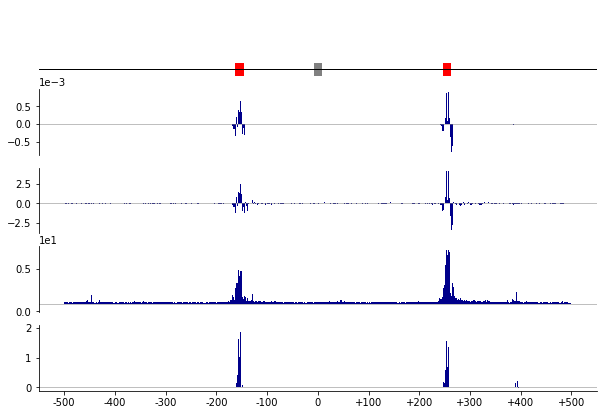

In [3]:
TF_list = ["CTCF",
"EBF1",
"SP1",
"PU1",
"RUNX3",
"NFYB",
"Nrf1",
"ELF1",
"NFKB",
"TCF3",
"Mxi1",
"USF1",
"YY1",
"USF2",
"ZEB1",
"PAX5",
"POU2F2",
"NRSF",
"PBX3",
"MEF2A",
"E2F4",
"BHLHE40",
"ELK1",
"NFIC",
"MEF2C",
"Max",
"SRF",
"Znf143",
"IRF4",
"ZBTB33",
"NFYA",
"ETS1",
"RFX5",
"STAT3",
"JunD",
"CEBPB",
"STAT1",
"FOS"]

exnum = 89
gcfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results_new/gcam/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
gcam = [float(item.strip().split()[1]) for item in open(gcfile_ex, "r").readlines()]

smfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results_new/reg/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
sm = [float(item.strip().split()[1]) for item in open(smfile_ex, "r").readlines()]

mutfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results_new/prtb/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
mut = [float(item.strip().split()[1])-0.90 for item in open(mutfile_ex, "r").readlines()]

dlfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/deeplift/c/rescale_conv_revealcancel_fc/weight_figures/vis-sample-%s.txt"%exnum
dl = [float(item.strip().split()[1]) for item in open(dlfile_ex, "r").readlines()]

sval = 1
color = "darkblue"

xvals = range(len(gcam))
motif_pos = [1 if ((idx>=338 and idx<354) or (idx>=748 and idx<764)) else 0 for idx in xvals]
core_pos = [1 if ((idx>=492 and idx<508)) else 0 for idx in xvals]

fig = plt.figure()
fig.set_size_inches((10,7))

ax = fig.add_subplot(511)
ax.axhline(y=0.5, color="black", linewidth=1)
ax.bar(xvals, motif_pos, color="red", width=1)
ax.bar(xvals, core_pos, color="grey", width=1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(bottom=0, top=5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(512)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, gcam, color=color, width=1)
ax.set_xticks([])
#ax.set_yticks(np.arange(-0.05, 0.11, 0.05))
ax.axhline(y=0, color="gray", linewidth=0.5)
#ax.set_ylim(bottom=-0.0009, top=0.001)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(513)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, sm, color=color,  width=1)
ax.set_xticks([])
ax.axhline(y=0, color="gray", linewidth=0.5)
#ax.set_yticks(np.arange(-0.05, 0.06, 0.05))
#ax.set_ylim(bottom=-3, top=4.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(514)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, mut, color=color,  width=1, bottom=0.90)
#ax.set_yticks(np.arange(0, 0.021, 0.01))
ax.set_xticks([])
ax.axhline(y=0.90, color="gray", linewidth=0.5)
ax.set_ylim(bottom=-0.1, top=7.6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(515)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, dl, color=color, width=1)
#ax.set_yticks(np.arange(0, 0.021, 0.01))
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])
ax.axhline(y=0, color="gray", linewidth=0.5)
#ax.set_ylim(bottom=-0.1, top=2.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fig.savefig(os.path.join(OUTDIR, "AgentBind_Figure2b_sim.pdf"))

# Figure 2C: real GCAM example

In [ ]:
# TODO

# Figure 2D/E: aggregate scores heatmap

In [17]:
COREDIR = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans-GC-balanced/storage_cp/AgentBind-GM12878-DanQ/tmp/"
factors = ["BHLHE40", "CEBPB", "CTCF", "E2F4", "EBF1", "ELF1", "ELK1", "ETS1", "FOS", \
           "IRF4", "JunD", "Max", "MEF2A", "MEF2C", "Mxi1", "NFIC", "NFKB", "NFYA", \
           "NFYB", "Nrf1", "NRSF", "PAX5", "PBX3", "POU2F2", "PU1", "RFX5", "RUNX3", \
           "SP1", "SRF", "STAT1", "STAT3", "TCF3", "USF1", "USF2", "YY1", "ZBTB33", "ZEB1", "Znf143"]
#factors = ["SP1", "TCF3"] # TODO remove
weights_core = []
weights_masked = []

def LoadWeights(file):
    f = open(file, "r")
    locline = f.readline()
    wline = f.readline()
    aggweights = [0]*1000
    numloc = 0
    while locline.strip() != "":
        numloc += 1
        weights = [min(0.01, abs(float(item))) for item in wline.strip().split(";")]
        if locline.strip()[-1] == "-":
            weights = weights[::-1] 
        aggweights = [weights[i]+aggweights[i] for i in range(len(weights))]
        locline = f.readline()
        wline = f.readline()
    return [item*1.0/numloc for item in aggweights]

for f in factors:
    print(f)
    corefile = os.path.join(COREDIR, "%s+GM12878"%f, "seqs_one_hot_c/vis-weights-total/weight.txt")
    maskfile = os.path.join(COREDIR, "%s+GM12878"%f, "seqs_one_hot_b/vis-weights-total/weight.txt")
    corew = LoadWeights(corefile)
    corem = LoadWeights(maskfile)
    weights_core.append(corew)
    weights_masked.append(corem)


BHLHE40
CEBPB
CTCF
E2F4
EBF1
ELF1
ELK1
ETS1
FOS
IRF4
JunD
Max
MEF2A
MEF2C
Mxi1
NFIC
NFKB
NFYA
NFYB
Nrf1
NRSF
PAX5
PBX3
POU2F2
PU1
RFX5
RUNX3
SP1
SRF
STAT1
STAT3
TCF3
USF1
USF2
YY1
ZBTB33
ZEB1
Znf143


In [ ]:
weights_core_df = pd.DataFrame(weights_core)
weights_core_df.index = factors

weights_mask_df = pd.DataFrame(weights_masked)
weights_mask_df.index = factors

df_concat = pd.concat([weights_core_df, weights_mask_df], axis=1)
g = sns.clustermap(df_concat, col_cluster=False, cmap="Blues", xticklabels=False, vmax=0.00025);
g.savefig(os.path.join(OUTDIR, "AgentBind_Figure2_AggPatterns.pdf"))

Nrf1
PU1
YY1
SP1
CTCF
MEF2A
YY1


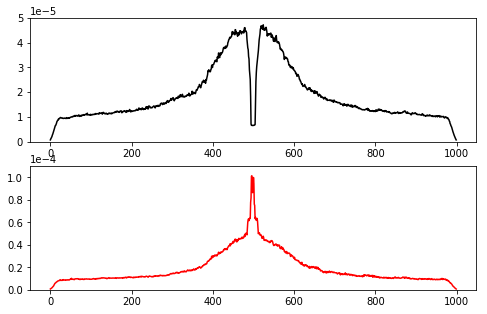

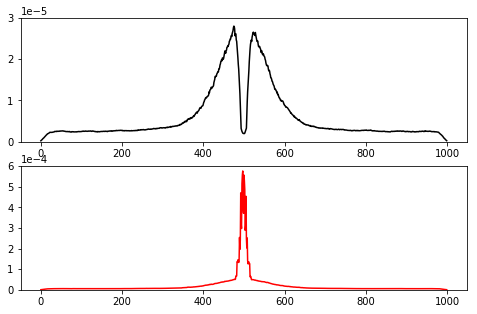

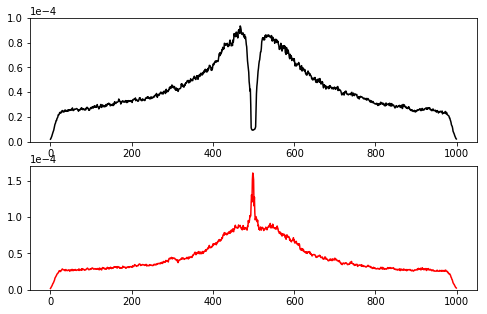

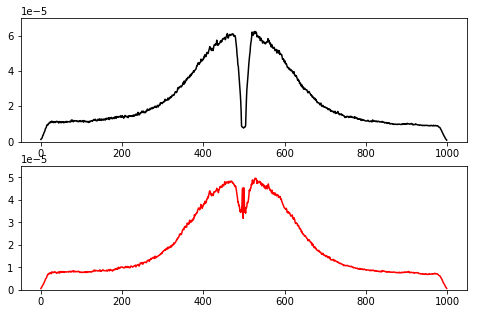

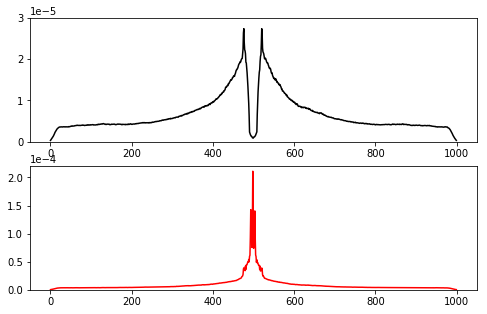

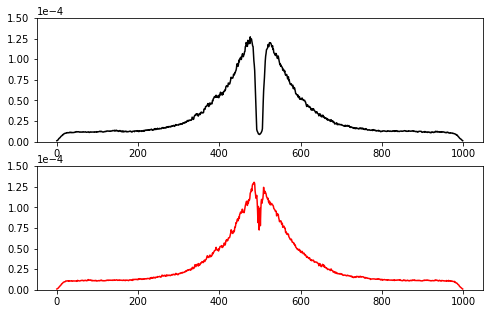

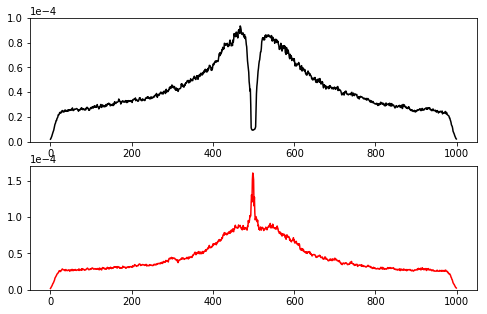

In [19]:
ylim_dict = {"Nrf1":{"b":5e-5, "c": 1.1e-4}, 
            "PU1":{"b":3e-5, "c": 6e-4},
             "YY1": {"b":1e-4, "c": 2e-4}, 
             "SP1":{"b":7e-5, "c": 5.5e-5},
             "CTCF": {"b":3e-5, "c": 2.2e-4},
             "MEF2A": {"b":1.5e-4, "c": 1.5e-4},
             "YY1":{"b":1e-4, "c": 1.7e-4}}
for factor in ["Nrf1","PU1","YY1", "SP1","CTCF","MEF2A","YY1"]:
    print (factor)
    fig = plt.figure()
    fig.set_size_inches((8, 5))
    wm = weights_masked[factors.index(factor)]
    wc = weights_core[factors.index(factor)]
    ax = fig.add_subplot(211)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.plot(range(len(wm)), wm, color="black");
    ax.set_ylim((0,ylim_dict[factor]["b"]))
    ax = fig.add_subplot(212)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.plot(range(len(wc)), wc, color="red");
    ax.set_ylim((0,ylim_dict[factor]["c"]))
    #fig.tight_layout()
    fig.savefig(os.path.join(OUTDIR, "AgentBind_Figure2_AggPatterns_%s.pdf"%factor))